In [183]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [184]:
# data_train = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [185]:
list(set(data.dtypes.tolist()))


[dtype('O'), dtype('float64'), dtype('int64')]

In [186]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num=df_num.drop('Id',axis=1)
len(df_num)#.head()

1460

In [187]:
a=df_num.isnull().sum().reset_index()
a

,index,0
0,MSSubClass,0
1,LotFrontage,259
2,LotArea,0
3,OverallQual,0
4,OverallCond,0
5,YearBuilt,0
6,YearRemodAdd,0
7,MasVnrArea,8
8,BsmtFinSF1,0
9,BsmtFinSF2,0


In [188]:
l=0
for i,j in zip(a[0],a['index']):
    if i!=0:
     print(f'{j}:{i}')
     l=l+1
print(l)

LotFrontage:259
MasVnrArea:8
GarageYrBlt:81
3


In [189]:
df_num["LotFrontage"].fillna(data.groupby("Street")["LotFrontage"].transform("mean"), inplace=True)
df_num["MasVnrArea"].fillna(data.groupby("Street")["MasVnrArea"].transform("mean"), inplace=True)
df_num["GarageYrBlt"].fillna(data.groupby("Street")["GarageYrBlt"].transform("mean"), inplace=True)

In [190]:
a=df_num.isnull().sum().reset_index()
l=0
for i,j in zip(a[0],a['index']):
    if i!=0:
     print(f'{j}:{i}')
     l=l+1
print(f'null number:{l}')

null number:0


In [191]:
df_num.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500


In [192]:
a=df_num.corr()
good_feature=[]
b=a.iloc[36,:].reset_index()
l=0
for i,j in zip(b['SalePrice'],b['index']):
    if i>0.5 and i<1:
     print(f'{j}:{i}')
     l=l+1
     good_feature.append(j)
print(f'{good_feature}    Feature number:{len(good_feature)}')

OverallQual:0.7909816005838053
YearBuilt:0.5228973328794967
YearRemodAdd:0.5071009671113866
TotalBsmtSF:0.6135805515591943
1stFlrSF:0.6058521846919153
GrLivArea:0.7086244776126515
FullBath:0.5606637627484453
TotRmsAbvGrd:0.5337231555820284
GarageCars:0.6404091972583519
GarageArea:0.6234314389183622
['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']    Feature number:10


In [193]:
# X_train= df_num.drop('SalePrice',axis=1)
X_train= df_num[good_feature].values
Y_train= df_num[["SalePrice"]].values

X_train, X_test, Y_train, Y_test = train_test_split(X_train,Y_train,test_size=0.2)

In [194]:
X_train.shape , Y_train.shape, X_test.shape, Y_test.shape

((1168, 10), (1168, 1), (292, 10), (292, 1))

In [195]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10,activation="relu"),
    tf.keras.layers.Dense(40,activation="relu"),
    tf.keras.layers.Dense(20,activation="relu"),
    tf.keras.layers.Dense(1,activation="linear")
])

In [196]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mae')

In [197]:
output=model.fit(X_train,Y_train,epochs=50)

Epoch 1/50


37/37 [==============================] - 1s 1ms/step - loss: 179584.9531
Epoch 2/50
37/37 [==============================] - 0s 1ms/step - loss: 178054.9844
Epoch 3/50
37/37 [==============================] - 0s 1ms/step - loss: 171985.8594
Epoch 4/50
37/37 [==============================] - 0s 1ms/step - loss: 150455.0000
Epoch 5/50
37/37 [==============================] - 0s 1ms/step - loss: 91840.6719
Epoch 6/50
37/37 [==============================] - 0s 1ms/step - loss: 46971.0039
Epoch 7/50
37/37 [==============================] - 0s 1ms/step - loss: 45618.1953
Epoch 8/50
37/37 [==============================] - 0s 1ms/step - loss: 44951.8242
Epoch 9/50
37/37 [==============================] - 0s 1ms/step - loss: 44342.6602
Epoch 10/50
37/37 [==============================] - 0s 1ms/step - loss: 43730.5859
Epoch 11/50
37/37 [==============================] - 0s 1ms/step - loss: 43194.2656
Epoch 12/50
37/37 [==============================] - 0s 1ms/step - loss: 42585.1250
Epoch 13

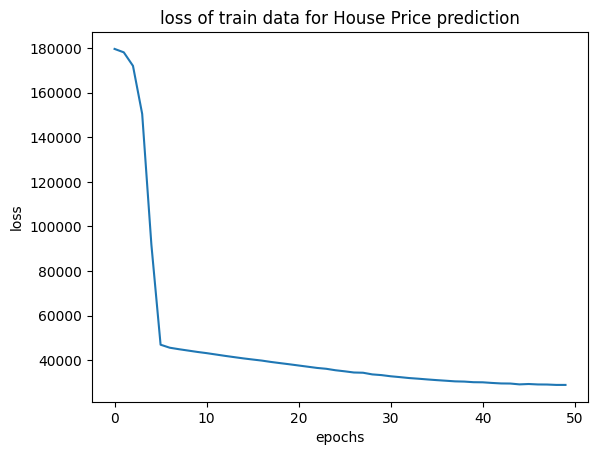

In [198]:
plt.plot(output.history['loss'])
plt.xlabel("epochs")
plt.ylabel('loss')
plt.title("loss of train data for House Price prediction")
plt.show()

In [199]:
loss=model.evaluate(X_test,Y_test)
print(f'loss of test data of House price prediction: {loss}')

10/10 [==============================] - 0s 1ms/step - loss: 32976.6758
loss of test data of House price prediction: 32976.67578125


## Information of my house: 

####  ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']

###  [6,1993,2006,129,1614,1614,1,2,2,500]

In [208]:
my_house=np.array([[6,1993,2006,129,1614,1614,1,2,2,500]])
price=model.predict(my_house)
print(f'Price of my House: {price[0][0]}')

1/1 [==============================] - 0s 30ms/step
Price of my House: 157711.1875


In [201]:
model.save("HousePrice_model.h5")

In [202]:
model= tf.keras.models.load_model("HousePrice_model.h5")
model.predict(my_house)

1/1 [==============================] - 0s 93ms/step


array([[157711.19]], dtype=float32)

##  predict TEST data for Submission  

In [203]:
test_data=pd.read_csv('test.csv')
test_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [204]:
list(set(test_data.dtypes.tolist()))
test_data_num = test_data.select_dtypes(include = ['float64', 'int64'])
a=test_data_num.isnull().sum().reset_index()
l=0
null_feature=[]
for i,j in zip(a[0],a['index']):
    if i!=0:
     print(f'{j}:{i}')
     null_feature.append(j)
     l=l+1
print(null_feature)
for i in null_feature:
    test_data_num[i].fillna(data.groupby("Street")[i].transform("mean"), inplace=True)
a=test_data_num.isnull().sum().reset_index()
l=0
for i,j in zip(a[0],a['index']):
    if i!=0:
     print(f'{j}:{i}')
     l=l+1
print(l)


LotFrontage:227
MasVnrArea:15
BsmtFinSF1:1
BsmtFinSF2:1
BsmtUnfSF:1
TotalBsmtSF:1
BsmtFullBath:2
BsmtHalfBath:2
GarageYrBlt:78
GarageCars:1
GarageArea:1
['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
0


In [205]:
X_test= test_data_num[good_feature].values

a=model.predict(X_test)
a=a.reshape(-1)
series = pd.Series(a, index=test_data_num['Id'])
# df=pd.DataFrame({'Id': test_data_num['Id']})
df1=pd.DataFrame({'SalePrice':series})
df1.to_csv('HousePrice_output.csv', encoding='utf-8')
df1

46/46 [==============================] - 0s 2ms/step


,SalePrice
Id,
1461,159587.265625
1462,168242.406250
1463,176646.265625
1464,174090.343750
1465,182191.078125
...,...
2915,80172.625000
2916,104167.312500
2917,182379.171875
